In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

print("Shape of the training data:", train_df.shape)
print("Shape of the training data:", test_df.shape)

Shape of the training data: (1460, 81)
Shape of the training data: (1459, 80)


In [4]:
# Sneek peak at the data
print(train_df.head())

# Get the info about the dataframe
print("Information of the training data: ", train_df.info())

   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non

In [5]:
# Check for missing values
print(train_df.isnull().sum().sort_values(ascending=False).head(20))


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Condition2         0
dtype: int64


In [6]:
# Quick statistical summary
print(train_df.describe())

                Id   MSSubClass  ...       YrSold      SalePrice
count  1460.000000  1460.000000  ...  1460.000000    1460.000000
mean    730.500000    56.897260  ...  2007.815753  180921.195890
std     421.610009    42.300571  ...     1.328095   79442.502883
min       1.000000    20.000000  ...  2006.000000   34900.000000
25%     365.750000    20.000000  ...  2007.000000  129975.000000
50%     730.500000    50.000000  ...  2008.000000  163000.000000
75%    1095.250000    70.000000  ...  2009.000000  214000.000000
max    1460.000000   190.000000  ...  2010.000000  755000.000000

[8 rows x 38 columns]


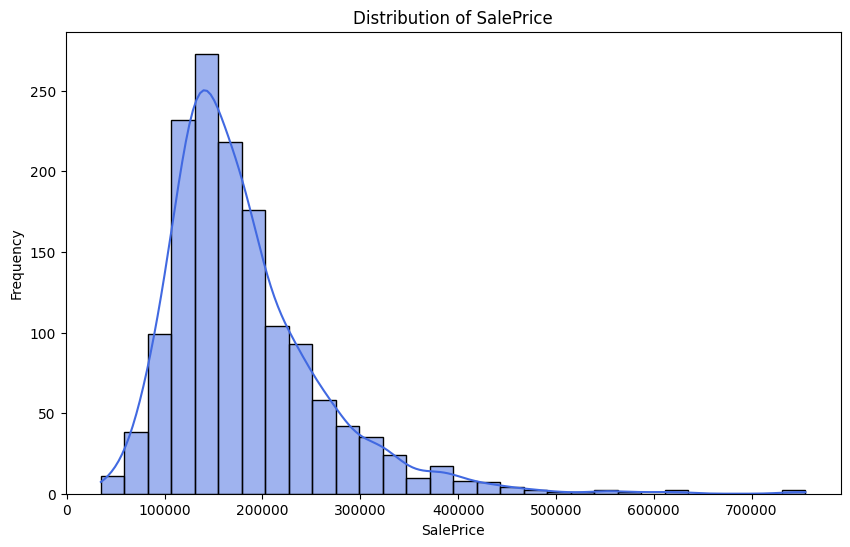

In [7]:
# Visualize the distribution of the target variable 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], kde=True, bins=30, color="royalblue")
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency') 
plt.show()

C:\Users\sonis\AppData\Local\Temp\ipykernel_20792\3557855432.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette="viridis")


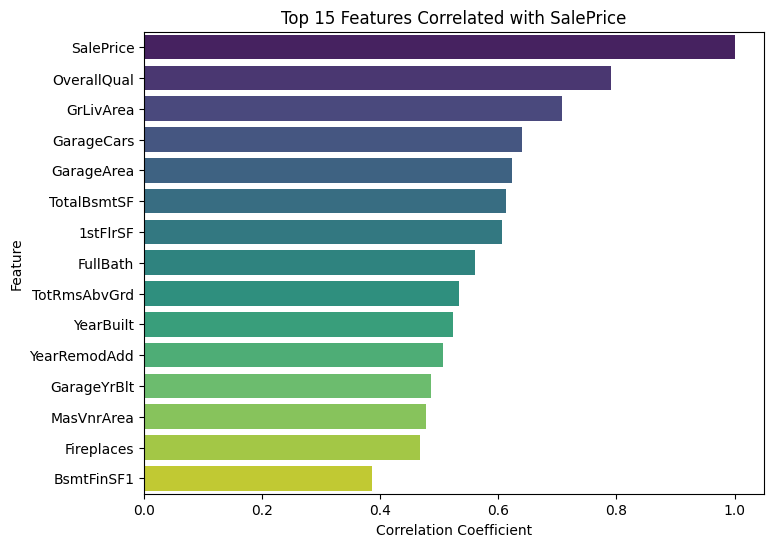

In [8]:
# Correlation heatmap
corr = train_df.corr(numeric_only=True)
top_corr = corr['SalePrice'].sort_values(ascending=False).head(15)
plt.figure(figsize=(8,6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette="viridis")
plt.title("Top 15 Features Correlated with SalePrice")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()

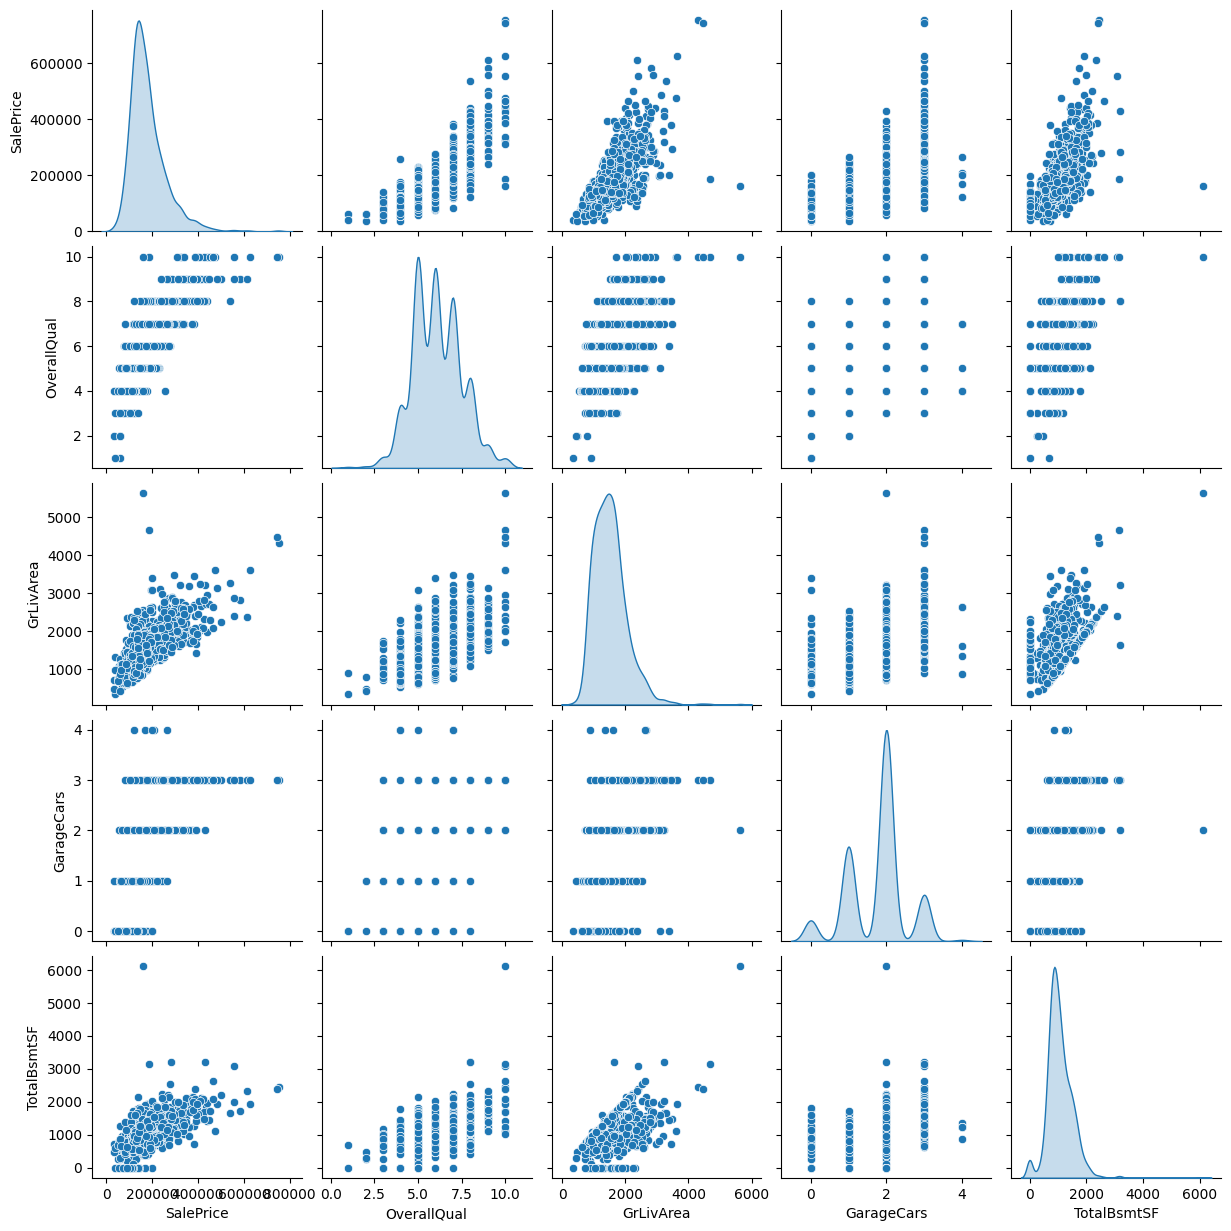

In [9]:
# Pairplot of top correlated features
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
sns.pairplot(train_df[cols], diag_kind='kde')
plt.show()

In [10]:
# Handle Missing values
# Fill none in the non-existent features
none_cols =  ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
             'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
             'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']
train_df[none_cols] = train_df[none_cols].fillna('None')

# Fill 0 for numerical features where NA means no feature
zero_cols = ['GarageYrBlt', 'GarageArea', 'GarageCars', 
             'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
             'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 
             'MasVnrArea']
train_df[zero_cols] = train_df[zero_cols].fillna(0)
#fill mode for common categorical features
mode_cols = ['MSZoning', 'Functional', 'Utilities', 'Exterior1st', 
             'Exterior2nd', 'KitchenQual', 'SaleType', 'Electrical']
for col in mode_cols:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

#fill LotFrontage with median of neighborhood
train_df['LotFrontage'] = train_df.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

In [11]:
# Check for missing values
print("Remaining missing values:", train_df.isnull().sum().sum())


Remaining missing values: 0


In [12]:
# Feature Engineering and creating new useful features
# Age of house at the time of sale
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']

# Time since last renovation
train_df['RemodAge'] = train_df['YrSold'] - train_df['YearRemodAdd']

# Total Bathrooms
train_df['TotalBathrooms'] = (train_df['FullBath'] + (0.5 * train_df['HalfBath']) + train_df['BsmtFullBath'] + (0.5 *  train_df['BsmtHalfBath']))

# Total Porch Area
train_df['TotalPoarchSF'] = (train_df['OpenPorchSF'] + train_df['EnclosedPorch'] + train_df['3SsnPorch'] + train_df['ScreenPorch'])

# Price per square foot
train_df['PricePerSqFt'] = train_df['SalePrice'] / train_df['GrLivArea']



In [13]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder

# Label encoding for ordinal categorical features
ordinal_features = ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
                    'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond']
le = LabelEncoder()
for col in ordinal_features:
    if col in train_df.columns:
        train_df[col]  = le.fit_transform(train_df[col])
        
        

In [14]:
# Fix skewness
import numpy as np

train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

In [15]:
print("Final dataset shape:", train_df.shape)
train_df.to_csv("train_cleaned.csv", index=False)


Final dataset shape: (1460, 86)


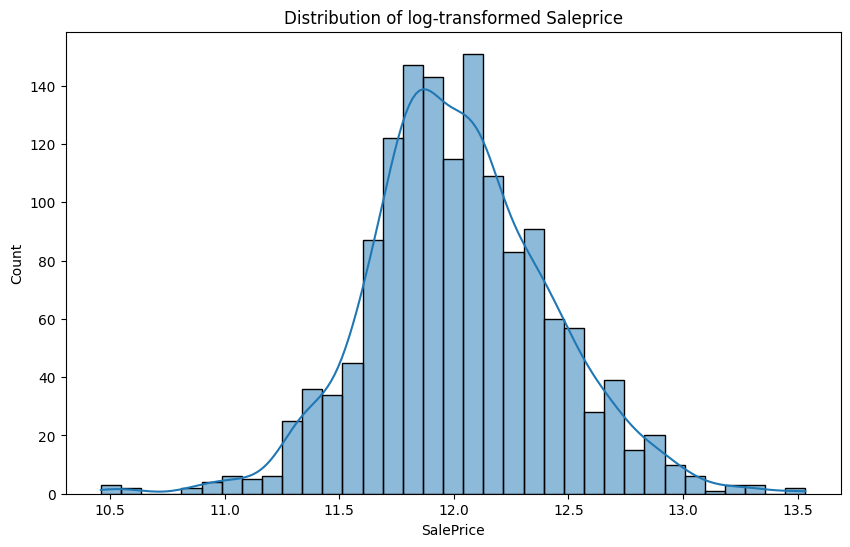

skewness:  0.12134661989685333
kurtosis:  0.809519155707878


In [16]:
# understand target variable after log transformation
plt.figure(figsize=(10,6))
sns.histplot(train_df['SalePrice'], kde=True)
plt.title("Distribution of log-transformed Saleprice")
plt.xlabel("SalePrice")
plt.show()

print("skewness: ", train_df['SalePrice'].skew())
print("kurtosis: ", train_df['SalePrice'].kurt())

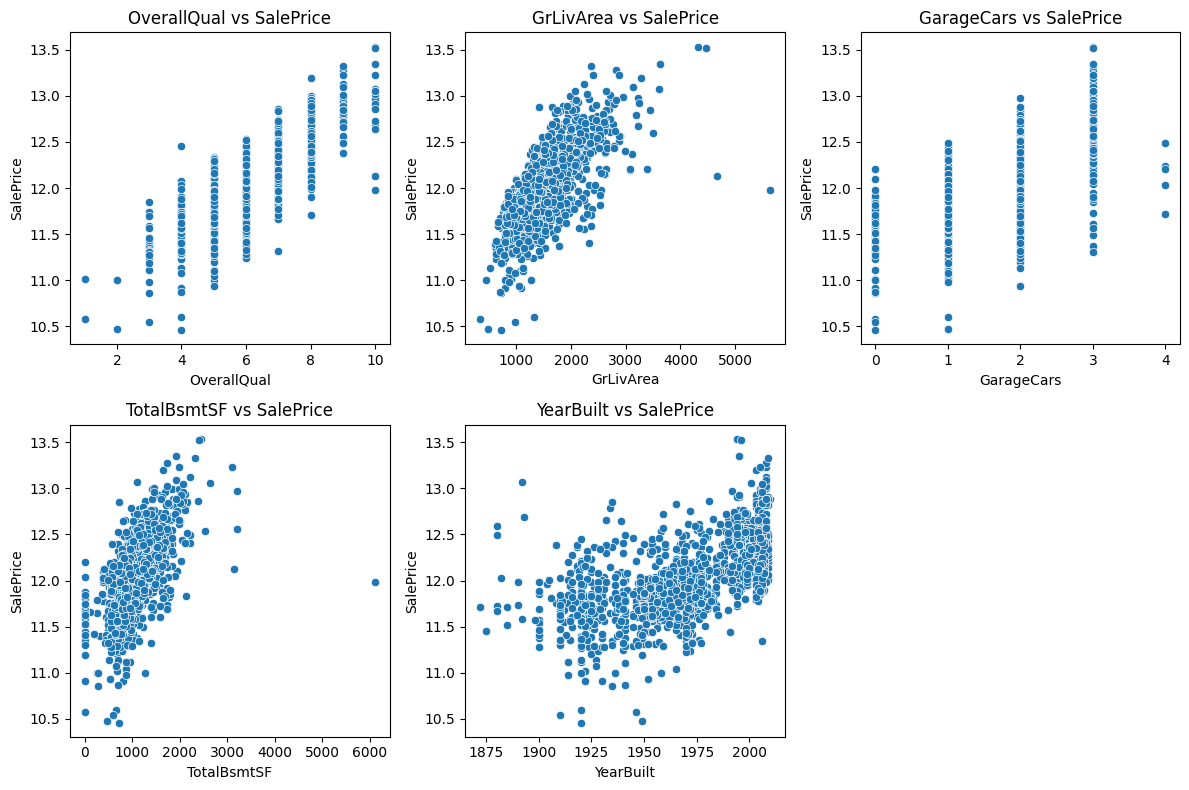

In [17]:
# Relationship Plots

features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']
plt.figure(figsize=(12,8))
for i, feature in enumerate(features,1):
    plt.subplot(2,3,i)
    sns.scatterplot(x=train_df[feature], y=train_df['SalePrice'])
    plt.title(f"{feature} vs SalePrice")
plt.tight_layout()
plt.show()

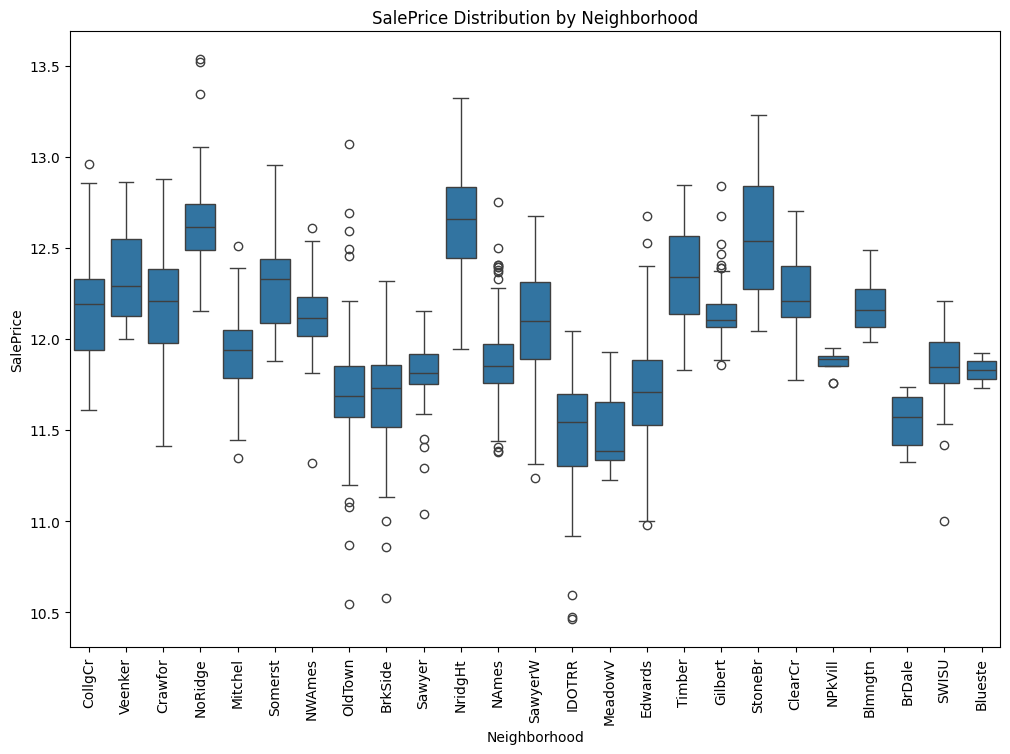

In [18]:
# Categorical Feature impact

plt.figure(figsize=(12,8))
sns.boxplot(x="Neighborhood", y="SalePrice", data=train_df)
plt.xticks(rotation = 90)
plt.title("SalePrice Distribution by Neighborhood")
plt.show()

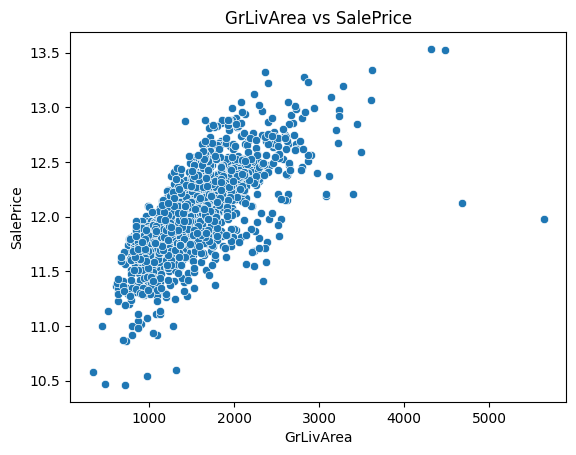

In [19]:
# Check for the outliers
sns.scatterplot(x='GrLivArea', y = 'SalePrice', data=train_df)
plt.title("GrLivArea vs SalePrice")
plt.show()


In [20]:
train_df = train_df[train_df['GrLivArea'] < 4000]

print(top_corr)


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64


In [21]:
# Split Data
from sklearn.model_selection import train_test_split

X = train_df.drop(['SalePrice'], axis=1)
y = train_df['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_val.shape)

(1164, 85) (292, 85)


In [22]:
# Encode Categorical Features
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)

X_train, X_val = X_train.align(X_val, join='left', axis=1, fill_value = 0)

In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_val_scaled)
mse_lr = mean_squared_error(y_val, y_pred_lr)
rmse_lr = mse_lr ** 0.5

print("Linear Regression RMSE:", rmse_lr)

Linear Regression RMSE: 0.27982520299220454


In [25]:
# Random forest regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_val)
mse_rf = mean_squared_error(y_val, y_pred_rf)
rmse_rf = mse_rf ** 0.5

print("Random Forest RMSE:", rmse_rf)

Random Forest RMSE: 0.09340588369692866


In [27]:
# XGBoost Regressor

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Model definition
xgb = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Fit model
xgb.fit(X_train, y_train)

# Predict on validation set
y_pred_xgb = xgb.predict(X_val)

# Evaluate performance
mse_xgb = mean_squared_error(y_val, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_val, y_pred_xgb)
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost MAE: {mae_xgb:.2f}")
print(f"XGBoost R² Score: {r2_xgb:.4f}")


XGBoost RMSE: 0.06
XGBoost MAE: 0.04
XGBoost R² Score: 0.9770


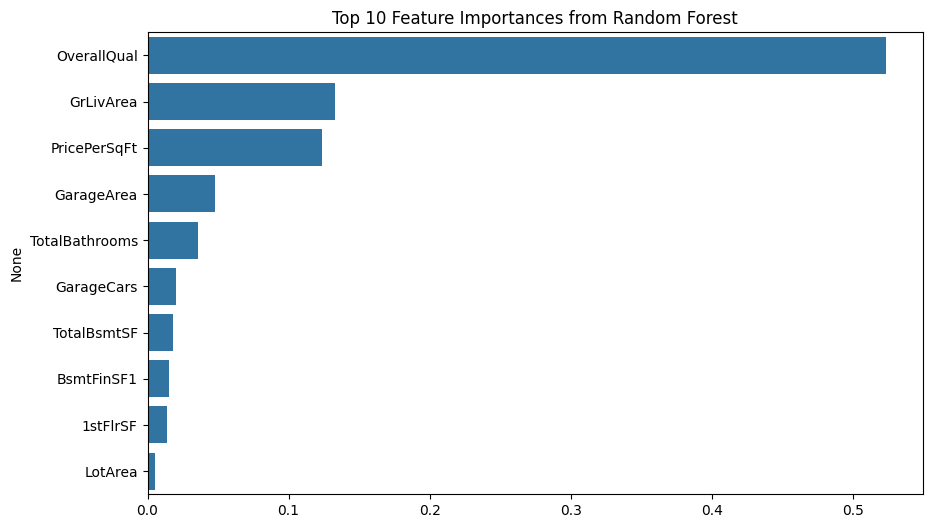

In [30]:
# Feature Importance from Random Forest
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Feature Importances from Random Forest")
plt.show()

In [31]:
# Export clean dataset
train_df.to_csv("house_price_cleaned.csv", index=False)

In [32]:
# Add Prediction (Actual vs Predicted)
pred_df = pd.DataFrame({
    'ActualPrice': np.expm1(y_val),
    'PredictedPrice': np.expm1(y_pred_xgb),
})
pred_df['Error'] = pred_df['ActualPrice'] - pred_df['PredictedPrice']
pred_df['AbsoluteError'] = pred_df['Error'].abs()

pred_df.to_csv("model_Predictions.csv", index=False)


In [33]:
# Export Feature Importance
importance_df = (
    pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False).reset_index())
importance_df.columns = ['Feature', 'Importance']
importance_df.to_csv("feature_importance.csv", index=False)